# Import Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jcopml.utils import save_model, load_model
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

from jcopml.plot import plot_missing_value, plot_residual
from jcopml.automl import AutoRegressor

# Importing Dataset

In [2]:
df = pd.read_csv('data/carprice.csv', index_col= 'ID')

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5953 entries, 1 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5953 non-null   object 
 1   Location           5953 non-null   object 
 2   Year               5953 non-null   int64  
 3   Kilometers_Driven  5953 non-null   int64  
 4   Fuel_Type          5953 non-null   object 
 5   Transmission       5953 non-null   object 
 6   Owner_Type         5953 non-null   object 
 7   Mileage_kmpl       5951 non-null   float64
 8   Engine_CC          5917 non-null   float64
 9   Power_bhp          5811 non-null   float64
 10  Seats              5911 non-null   float64
 11  Price              5953 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 604.6+ KB


### Data Description

In [4]:
df.describe()

,Year,Kilometers_Driven,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
count,5953.000000,5.953000e+03,5951.000000,5917.000000,5811.000000,5911.000000,5953.000000
mean,2013.356459,5.876729e+04,18.064325,1627.298293,113.803144,5.281509,9.547306
std,3.275069,9.174384e+04,4.511393,601.584633,53.896719,0.810628,11.230163
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.100000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.120000,1495.000000,98.600000,5.000000,5.700000
75%,2016.000000,7.300000e+04,21.025000,1991.000000,139.010000,5.000000,10.000000
max,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,160.000000


In [5]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,5953,5953,5953,5953,5953
unique,1849,11,3,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,772,3205,4233,4876


###  Check Missing Value

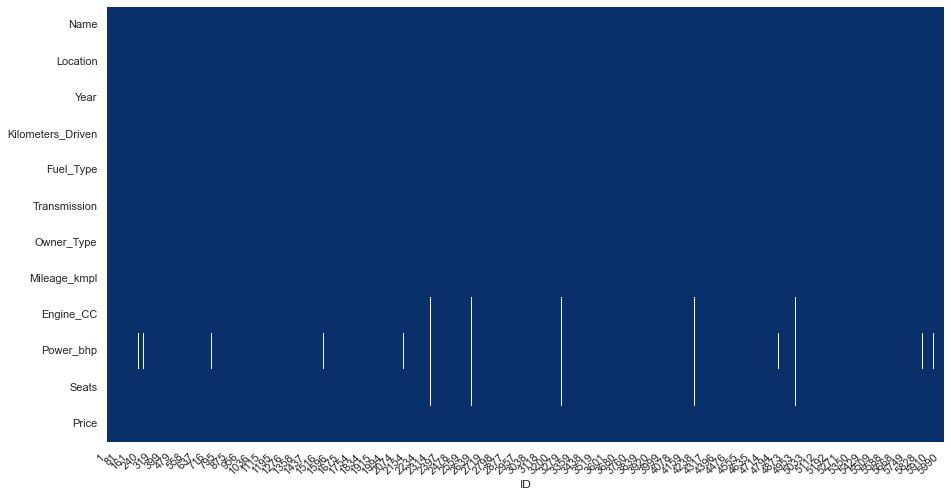

In [6]:
plot_missing_value(df)

`Dataset has a missing value that can be handled by imputing the value by default with 'Median' for numerical and 'Most_frequent' for categorical in Pipeline.`

Columns list with Missing Value:
1. Engine_CC (Numerical)
2. Power_bhp (Numerical)
3. Seats     (Categorical)
4. Mileage_kmpl (Numerical)

## Adding Feature

In [7]:
df['Company_Name'] = df['Name'].apply(lambda x: x.split()[0])

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_Name
ID,,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan


In [8]:
df['Company_Name'] = df['Company_Name'].replace('ISUZU', 'Isuzu')

In [9]:
df.drop(columns='Name', inplace = True)

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_Name
ID,,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan


In [10]:
# Current Year

df['Age_of_Car'] = 2021 - df.Year
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_Name,Age_of_Car
ID,,,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,6
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,10
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,9
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,8
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan,8


### Car Price in 2021
`I get an information of Indian inflation in September 2021 is 4.89% (When EDA was made)`

Source: https://www.statista.com/statistics/271322/inflation-rate-in-india/

In [11]:
df['Current_Price'] = df.Price + df.Price*0.0489 

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_Name,Age_of_Car,Current_Price
ID,,,,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,6,13.111250
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,10,4.720050
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,9,6.293400
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,8,18.607486
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan,8,3.671150


# Dataset Splitting

In [12]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_Name,Age_of_Car,Current_Price
ID,,,,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,6,13.111250
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,10,4.720050
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,9,6.293400
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,8,18.607486
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,Nissan,8,3.671150


In [13]:
X = df.drop(columns="Current_Price")
y = df.Current_Price

# Modeling

In [14]:
model = AutoRegressor(num_feature=  ['Year','Kilometers_Driven','Mileage_kmpl','Engine_CC','Power_bhp','Age_of_Car','Seats'],
                      cat_feature= ['Location','Fuel_Type','Transmission','Owner_Type','Company_Name'])

In [15]:
model.fit(X, y, cv = 5)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
================== Best Model Info ==================
algo                      | XGBRegressor
algo__colsample_bytree    | 0.1349512609864809
algo__gamma               | 6
algo__learning_rate       | 0.11862189410697288
algo__max_depth           | 5
algo__n_estimators        | 196
algo__reg_alpha           | 2.0486889035689253
algo__reg_lambda          | 0.012194715233377654
algo__subsample           | 0.7826259151953849

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | SimpleImputer(add_indicator=False, strategy='mean')

=========== Score ===========
Train: 0.972769123421152
Valid: 0.9039086230293158
Test : 0.8678599610979904


# View Results

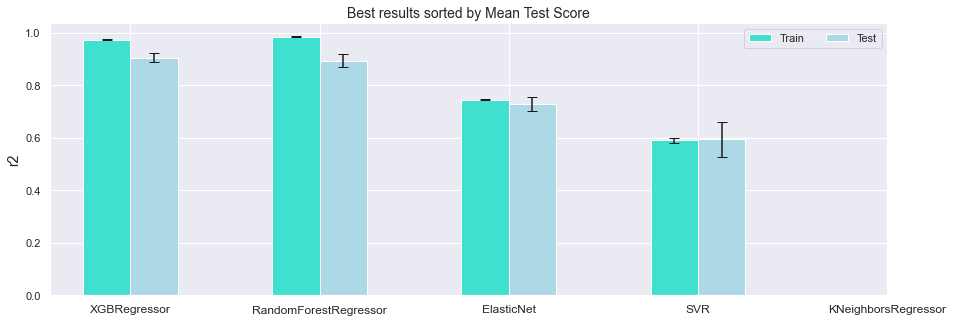

In [16]:
model.plot_results()

# Feature Importance

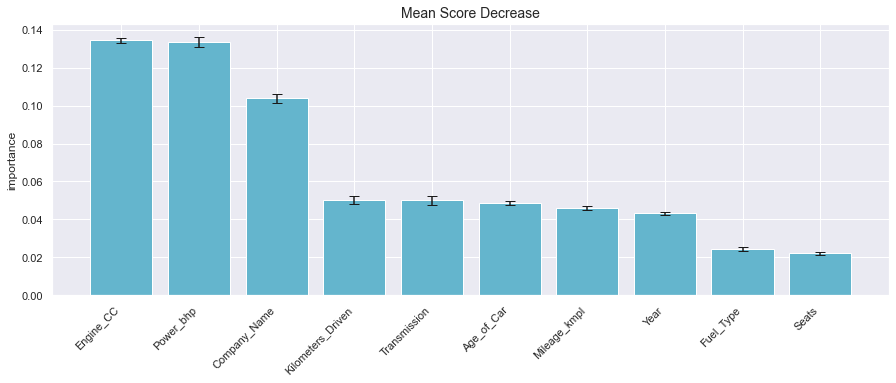

In [17]:
model.mean_score_decrease()

# Modeling

In [18]:
model = AutoRegressor(num_feature=  ['Year','Kilometers_Driven','Mileage_kmpl','Engine_CC','Power_bhp','Age_of_Car','Seats'],
                      cat_feature= ['Fuel_Type','Transmission','Company_Name'])

In [19]:
model.fit(X, y, cv = 5, algo = ['xgb'], n_trial= 150)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
================== Best Model Info ==================
algo                      | XGBRegressor
algo__colsample_bytree    | 0.2640554906283623
algo__gamma               | 7
algo__learning_rate       | 0.04407155063074602
algo__max_depth           | 7
algo__n_estimators        | 185
algo__reg_alpha           | 0.020416881527138202
algo__reg_lambda          | 0.003013342710819584
algo__subsample           | 0.7452636403699475

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=False, n_neighbors=5)
numerical_transformer     | PowerTransformer(method='yeo-johnson')

=========== Score ===========
Train: 0.9811521274637821
Valid: 0.9057855649315473
Test : 0.8737671541251396


# Polynomial Feature

In [20]:
model.fit(X, y, cv = 5, algo = ['xgb'], n_trial= 150, poly=True)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
================== Best Model Info ==================
algo                      | XGBRegressor
algo__colsample_bytree    | 0.41167388898046076
algo__gamma               | 5
algo__learning_rate       | 0.06266275266989066
algo__max_depth           | 10
algo__n_estimators        | 168
algo__reg_alpha           | 3.5214501851613007
algo__reg_lambda          | 0.011055400834436813
algo__subsample           | 0.30765227014519236

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=True, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=False, n_neighbors=5)
numerical_poly            | PolynomialFeatures
numerical_scaler          | StandardScaler

=========== Score ===========
Train: 0.982023164853018
Valid: 0.907376415709282
Test : 0.8749493621104897


# Evaluation

In [21]:
from jcopml.plot import plot_residual

In [22]:
X_train = model.X_train
y_train = model.y_train
X_test = model.X_test
y_test = model.y_test

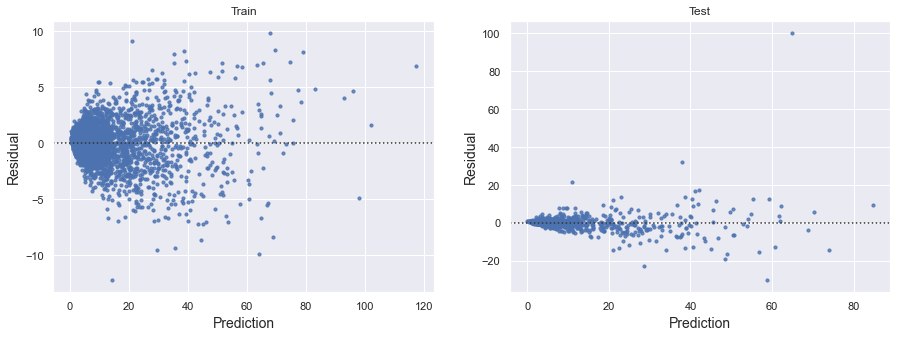

In [23]:
plot_residual(X_train, y_train, X_test, y_test, model.model)

### Error Checking

In [24]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error').head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price,Company_Name,Age_of_Car,pred,actual,error
ID,,,,,,,,,,,,,,,,
4911,Pune,2012,69000,Petrol,Manual,First,16.80,1497.0,116.30,5.0,4.90,Honda,9,5.139907,5.139610,0.000297
275,Hyderabad,2018,31025,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.15,Maruti,3,7.500107,7.499635,0.000472
3484,Pune,2016,42244,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.00,Hyundai,5,12.586246,12.586800,0.000554
3420,Pune,2010,39000,Diesel,Manual,First,22.07,1199.0,73.90,5.0,3.05,Volkswagen,11,3.197971,3.199145,0.001174
1003,Chennai,2008,55000,Petrol,Manual,Second,18.90,1061.0,67.00,5.0,1.75,Maruti,13,1.837187,1.835575,0.001612
2565,Delhi,2011,103814,Diesel,Manual,Second,22.32,1582.0,126.32,5.0,4.50,Hyundai,10,4.726590,4.720050,0.006540
3552,Chennai,2018,48000,Diesel,Manual,First,24.00,1186.0,73.97,5.0,5.95,Hyundai,3,6.232838,6.240955,0.008117
2721,Coimbatore,2016,54727,Diesel,Manual,First,20.14,1498.0,88.73,5.0,6.63,Volkswagen,5,6.945680,6.954207,0.008527
1663,Delhi,2012,45631,Petrol,Manual,Second,22.50,998.0,67.04,5.0,2.74,Maruti,9,2.884087,2.873986,0.010101


# Save Model

In [25]:
model.save(fname= 'Car_Price_Prediction_Baseline.pkl')

Model is pickled as model/Car_Price_Prediction_Baseline.pkl


**`Note: This model being a bencmark to improve anothers model`**